<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import sys

class Map:
  def __init__(self, map):
    lines = map.split("\n")
    self.elevation = np.zeros((len(lines[0]), len(lines)))
    self.visited = np.empty((len(lines[0]), len(lines)))
    self.visited.fill(sys.maxsize)

    for y in range(len(lines)):
      line = lines[y]
      for x in range(len(line)):
        letter = line[x]
        if letter == "S":
          self.start = (x, y)
          letter = "a"
        if letter == "E":
          self.end = (x, y)
          letter = "z"
        self.elevation[x, y] = ord(letter) - ord("a")

    self.to_visit = [(0, self.start, None)]
    self.visiting_order = []

  def step(self):
    next_visit = []
    for distance, coord, source in self.to_visit:
      if self.visited[coord] > distance:
        self.visiting_order.append((source, coord))
        self.visited[coord] = distance
        x, y = coord
        current_elevation = self.elevation[coord]
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
          dest_x, dest_y = x+dx, y+dy
          if dest_x >= 0 and dest_y >= 0 and dest_x < self.elevation.shape[0] and dest_y < self.elevation.shape[1]:
            dest_elevation = self.elevation[dest_x, dest_y]
            if dest_elevation <= current_elevation + 1:
              next_visit.append((distance+1, (dest_x, dest_y), coord)) 
    self.to_visit = next_visit

  def solve(self):
    while self.visited[self.end] == sys.maxsize and len(self.to_visit) > 0:
      self.step()
    return self.visited[self.end]

  def shortest_path_length(self):
    return self.visited[self.end]


  def find_previous(self, searched):
    for source, dest in self.visiting_order:
      if dest == searched:
        return source

  def path(self):
    result = []
    searched = self.end
    while searched != None:
      result.insert(0, searched)
      searched = self.find_previous(searched)
    return result
    


class Finder:
  def __init__(self, input):
    self.input = input

  def shortest_route(self):
    init_map = Map(self.input)
    min_dist = sys.maxsize
    best_map = None
    possible_starts = np.transpose(np.nonzero(init_map.elevation == 0))
    for possible_start in possible_starts:
      map = Map(self.input)
      map.start = tuple(possible_start)
      map.to_visit = [(0, tuple(possible_start), None)]
      dist = map.solve()
      if dist  < min_dist:
        min_dist = dist
        best_map = map
    return best_map
  



In [24]:
import unittest

example = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi"""

class TestAcceptance(unittest.TestCase):

    def test_parse_elevation(self):
      map = Map(example)
      self.assertEqual((0,0), map.start)
      self.assertEqual((5,2), map.end)
      self.assertEqual(0, map.elevation[0,0])
      self.assertEqual(1, map.elevation[2,0])
      self.assertEqual(16, map.elevation[3,0])
      self.assertEqual([(0, map.start)], map.to_visit)

    def test_parse_elevation(self):
      map = Map(example)
      map.step()
      self.assertEqual(0, map.visited[0,0])
      self.assertEqual([(1, (1, 0), (0, 0)), (1, (0, 1), (0, 0))], map.to_visit)
      map.step()
      self.assertEqual(1, map.visited[0,1])
      self.assertEqual(1, map.visited[1,0])
      self.assertEqual([(2, (0, 0), (1, 0)), 
                        (2, (2, 0), (1, 0)), 
                        (2, (1, 1), (1, 0)), 
                        (2, (1, 1), (0, 1)), 
                        (2, (0, 0), (0, 1)),
                        (2, (0, 2), (0, 1))], 
          map.to_visit
      )
      
    def test_solve_maze(self):
      map = Map(example)
      map.solve()
      self.assertEqual(31, map.visited[map.end])

    def test_fastest_route_finder(self):
      finder = Finder(example)
      map = finder.shortest_route()
      print(map)
      self.assertEqual(29, map.visited[map.end])

    def test_build_path(self):
      map = Map(example)
      map.solve()
      self.assertEqual([(0, 0),
        (1, 0),
        (2, 0),
        (2, 1),
        (2, 2),
        (2, 3),
        (2, 4),
        (3, 4),
        (4, 4),
        (5, 4),
        (6, 4),
        (7, 4),
        (7, 3),
        (7, 2),
        (7, 1),
        (7, 0),
        (6, 0),
        (5, 0),
        (4, 0),
        (3, 0),
        (3, 1),
        (3, 2),
        (3, 3),
        (4, 3),
        (5, 3),
        (6, 3),
        (6, 2),
        (6, 1),
        (5, 1),
        (4, 1),
        (4, 2),
        (5, 2)], map.path())



unittest.main(argv=[''], verbosity=2, exit=False)

test_build_path (__main__.TestAcceptance) ... ok
test_fastest_route_finder (__main__.TestAcceptance) ... ok
test_parse_elevation (__main__.TestAcceptance) ... ok
test_solve_maze (__main__.TestAcceptance) ... 

ok

----------------------------------------------------------------------
Ran 4 tests in 0.023s

OK


In [25]:
#@title Define my input
input = """abcccccccccccccccccaaccccccccccccaaaaaaaacccccccccccaaaaaccccaaaaaaccaaaaaaaaaaaaaaaaaccccccccccccccccaaacccccaaaaaaaacccaaaccccccccccccccccccccccccccccccccccccccccccccccccccaaaaa
abccccccccccccccccaaacaacccccccccccaaaacccccccccccccaaaaaacccaaaaaaccaaaaaaaaaaaaaaaaaaaacccccccccaaacaaacccccaaaaaaaaaccaaaaccccccccccccccccccccccccccccccccccccccccccccccccaaaaaa
abcccccccccccccccccaaaaacccccccccccaaaaaccccccccccccaaaaaaccccaaaacccaaaacccaaaaaaaaaaaaacccccccccaaaaaaaaaacccaaaaaaaaccaaaaccccccccccccccccccccccccccccccccccaaacccccccccccaaaaaa
abcccccccccccccccaaaaaacccccccccccaaacaaccaaccccccccaaaaaaccccaaaacccaaaccccaaaaaaaaaaaaaccccccccccaaaaaaaaaccaaaaaacccccaaacccccccccccccccccccccccccccccccccccaaaccccccccccccccaaa
abcccccccccccccccaaaaaaaacccccccccaacccacaaacaacccccccaaccccccaccaccccccccaaaaaaaaaaaaccccccccccccccaaaaaaacccaaaaaaacccccccccccccaacccccccccccccccccccccccccccaaaccccccccccccccaaa
abcccccccccccccccaacaaaaacccccccccccccccccaaaaacccccccccccccccccccccccccccaaaaaaaaaaaaccccccccccccccaaaaaaccccaaccaaacccccccccccaaaaaaccccccccccccccccccccccccccdccccccccccccccccaa
abccaacccccccaaacccaaacaccccccccccaaacccaaaaaaccccccccccccccccccccccccccccaaacccaaaaaacaaaaccccccccaaaaaaaccccccccaaacccccccccccaaaaaacccccccccccccccccllllllcccdddddcccccccccccccc
abaaaacccacccaaccccaacccccccccccccaaacccaaaaaaaacccccccccccccccccaaccccccccacccaaaaccccaaaaccccccccaaacaaaccccccccccccccccccccccaaaaaaccccccccccccccccllllllllldddddddddddccaaccccc
abaaaaccaaaaaaaacccccccccccccccaaaaaaaacaacaaaaacccccccccccccccccaaacccccccaaacaaccccccaaaacccccccccccccaaccccccccccccccccccccccaaaaaccccccccccccccccclllllllllldddddddddeeaaaccccc
abaaaccccaaaaaaaaccccccccaaacccaaaaaaaacccaaacccccccccccccccccaaaaaaaaccccccaaaaacccccccaacccccccccccccccccccccccccccccccccccccccaaaaccccaaaccccccccckllppppplllmmmmmmmdeeeeaaccccc
abaaaacccaaaaaaaaacccccaaaaaaccccaaaaaccccaaccccccccccccccccccaaaaaaaaccccccaaaaaaacccccccccccccccccccccccccccccccccccccccccccccccccccccaaaacccccccckklpppppppplmmmmmmmmmeeeeaccccc
abaaaacccaaaaaaaaacccccaaaaaacccaaaaaaccccccccaacccccccccccccccaaaaaaccccccaaaaaaaacccccccccccccccccccccccccccccccccccccccccccccccccccccaaaacccccccckkkppppppppqmmmmmmmmmmeeeaacccc
abaaaaaccaaaaaaaaccccccaaaaaacccaaaaaaccccccacaaaacccccccccccccaaaaaaccccccaaaaaaaaccccccccaaaaccccccccaaacccccccccccccccccccccccccccccccaaacccccccckkkpppuuuppqqqqqqqqmmmeeeeacccc
abacccccaaaaaaaccccccccaaaaaccccaccaaaccccccaaaaaacccccacccccccaaaaaaccccccaaaaaacaaaccccccaaaaccccccccaaaacccccccccccccccccccccccccccccccccccccccckkkpppuuuuuuqqqqqqqqqnnneeeccccc
abcccccccaccaaaccccccccaaaaacccccccccccccccccaaaacccaaaacccccccaacaaacccccccccaaacaaaaaccccaaaaccccccccaaaaccccccccccccccccccccccccccccccccccccccckkkkpppuuuuuuuqvvvvqqqnnneeeccccc
abcccccccccccaaacaaccccccccccccccccccccccccccaaaacccaaaaaacccccccccccccccccccccccaaaaaaccccaaacccccccccaaaccccccccccccccccccccccccccccccccccccccckkkkrrpuuuxxxuvvvvvvvqqnnneeeccccc
abcccccccccccccccaacaaaccccccccccccccccccccccaacaacccaaaaacccccccccccccccccccccccaaaaaaccccccccccccccccccccccccccccccccccccccccccccccccccccccccckkkkrrrruuxxxxuvvvvvvvqqnnneeeccccc
abcccccccccccccccaaaaacccccccccccccccccccccccccccaccaaaaacccccaaccccccccccccccccccaaaaaccccccccccccccccaaaccccccccccccccaaacccccccccccccccccccckkkkrrrruuuxxxxyyyyyvvvqqnnneecccccc
abcccccccccccccaaaaaacccccccccccaacaacccccccccccaaaaaaaaacccacaaaacaaccaaccccccccaaacaaccccccccccaaccccaaaaaacccaacaacccaaacacccccccccccccccccjjkkrrrruuuuuxxxyyyyyvvqrqnneffcccccc
abcccccccccccccaaaaaaaacccaaacccaaaaaccccccaacccaaaaaaaaacccaaaaaacaaaaaaccccccccaaacaaacccccccaaaaaacaaaaaaacccaaaaacaaaaaaaaccccccccccccccccjjjrrrtttuuxxxxxyyyyyvvrrnnnfffcccccc
SbccccccccccccccccaaaaacccaaaaccaaaaaaccccaaaaaacaaaaaaaaacccaaaacccaaaaaccccccccaaaaaaacccccccaaaaaaaaaaaaaaccaaaaaccaaaaaaaaccccccccccccccccjjjrrrtttxxxEzzzzyyyvvrrrnnnfffcccccc
abccccccccccaaaccaaccaacccaaaaccaaaaaacccccaaaaacaaaaaaaaacccaaaaccaaaaaacccccccccaaaaaaccccccccaaaacaaaaaaacccaaaaaaccaaaaaacccccccccccccccccjjjrrrtttxxxxxyyyyyyvvrrrnnnfffcccccc
abcccccccccaaaaccaacccccccaaacccaaaaaacccaaaaaaaaaaaaaaaaacccaacacaaaaaaaacccccaaaaaaaacccccccccaaaacccaaaaaaccccaaaacccaaaaacccccccccccccccccjjjrrrtttxxxxxyyyyyyywvrrnnnfffcccccc
abcccccccccaaaacccccccccccccccccccaaaccccaaaaaaaaaaaaaaaaaacccccccaaaaaaaacccccaaaaaaaaaccccccccaccacccaaaaaaccccacccccaaaaaacccccccccccccccccjjjrrrrttttxxxyyyyyyywwrrroooffcccccc
abccccccccccaaaccccccccccccccccccccccccccaaaaaaaaaccaaaaaaaccccccccccaaccccccccaaaaaaaaaaccccccccccccccaacccccccccccccccaaccccccccccccccccccccjjjjqqqqttttxxyywwwwwwwwrrooofffccccc
abcccccccccccccccccccccccccccccccccccccccccaaacacccccaaaaccccccccccccaacccccccccccaaacaaacccccccccccccccccccccccccccccaaacccccccccccccccccccaacjjjjqqqqqttwwwwwwwwwwwrrrooofffccccc
abcccccccccccccccccccccccccccccccccccccccccaaccccccccccaacccccccccccccccccccccccccaaacccccccccccccccccccccccccccccccccaaacccccccccccccccccaaaaaajjjjqqqqttwwwwwwsswwrrrrooofffccccc
abcccccaaaaccccccccccccccaacaaccccccccccccccccccccccccccccccccccccccccccccccccccccaacccccccccccccccccccccccccccccccaaaaaaaaccaaaacccccccccaaaaaacjjjiqqqtttwwwwsssssrrrrooofffccccc
abccccaaaaaccccccccccccccaaaaacccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccaaaaaaaaccaaaaacccccccccaaaaacciiiiqqttswwwssssssrrroooogffccccc
abccccaaaaaacccccccccccccaaaaaacccaaaccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccaaaaaccaaaaaaccccccccaaaaacccciiiqqqssssssspppooooooogggaccccc
abccccaaaaaaccccccccaacccaaaaaaccccaacccccccccccccccccccccccccccccccccaaaaccccccccccccccccccccccccccccccccccccccccccaaaaaaccaaaaaaccccccccaaaaaccccciiiqqsssssspppppoooooggggaacccc
abccccaaaaaccccccaaaaacccaaaaaacaacaaaaaccccccccccccccccccccaacccccccaaaaacccccccccccaaaccccccccccccccccccccccccccccaaaaaacccaaaaacccccccccacccccccciiiqqqpssspppppgggggggggaaacccc
abccccccaaacccccccaaaaaccccaaaccaaaaaaaacccccccaacccccccaaccaacccccccaaaaaacccccccccaaaacccccccccccaaaaccccccccccccaaccaaacccaaacccccaaacaaaccccccccciiqqppppppphhhggggggggaaaacccc
abccccccccccccccccaaaaaccccccccccaaaaaccccccccaaacaaccccaaaaaacccccccaaaaaaaccccccccaaaacccccccccccaaaacccccccccaaaaaacccccccccccccccaaaaaaaccccccccciiippppppphhhhggggggcaaacccccc
abaacccccccccccccaaaaaccccccccccccaaaaaccccccccaaaaacccccaaaaaaacccccaaaaacaaacccccccaaacccccccccccaaaacccccccccaaaaacccccccccccccccccaaaaaacccccccccciiiippphhhhhhcccccccaaacccccc
abaacccccccccccccccaaacccccccccccaaacaaccccccaaaaaaccccccaaaaaaacccaaccaaacaaaaccaaaccccccccccccccccaaacccccccccaaaaaaacccccccccccccccaaaaaaaacccccccciiihhhhhhhhaaaccccccccccccccc
abaaccccccccccccccccccccccccccccccaacccccccccaaaaaaaacccaaaaaaccaaaaaacccccaaaacaaaaaccccccccccccccccccccccccccaaaaaaaaccccccccccccccaaaaaaaaaccccccccciihhhhhhcaaaacccccccccccccca
abaaccccccccccccccccccccccccccccccccaacccccccaacaaaaacccaaaaaaccaaaaacccccccaaaaaaaacccccccccccccccccccccccccccaaaaaaaacccccccccaaacaaaaaaaaaacccccccccccchhhaccccaacccccccccccccca
abaaccccccccccccccccccccccccccccccccaaaaaaccccccaaccccccccccaaccaaaaaaacccccaaaaaaaccccccccccccccccccccccccaaaccacaaacccccccccccaaaaaaacaaacaaaaaacccccccccaaacccccccccccccccaaaaaa
abccccccccccccccccccccccccccccccccccaaaaaccccccaaccccccccccccccaaaaaaaacaaaaaaaaaaccccccccccccccccccccccccaaaaaaccaaaccccccccccccaaaaaacaaacaaaaaacccccccccaaaccccccccccccccccaaaaa
abccccccccccccccccccccccccccccccccaaaaaaaacccccccccccccccccccccaaaaaaaacaaaaaaaaaaaaacccccccccccccccccccccaaaaaacccccccccccccccaaaaaaaaaaaaaaaaaacccccccccccccccccccccccccccccaaaaa"""


In [26]:
    
print(f"The shortest path to the end of the forest is {Map(input).solve()} steps long.")

finder = Finder(input)
best_map = finder.shortest_route()

print(f"The shortest path from any 'a' to the end is {best_map.shortest_path_length()} steps long and starts at {best_map.start}.")


The shortest path to the end of the forest is 484.0 steps long.
The shortest path from any 'a' to the end is 478.0 steps long and starts at (0, 26).


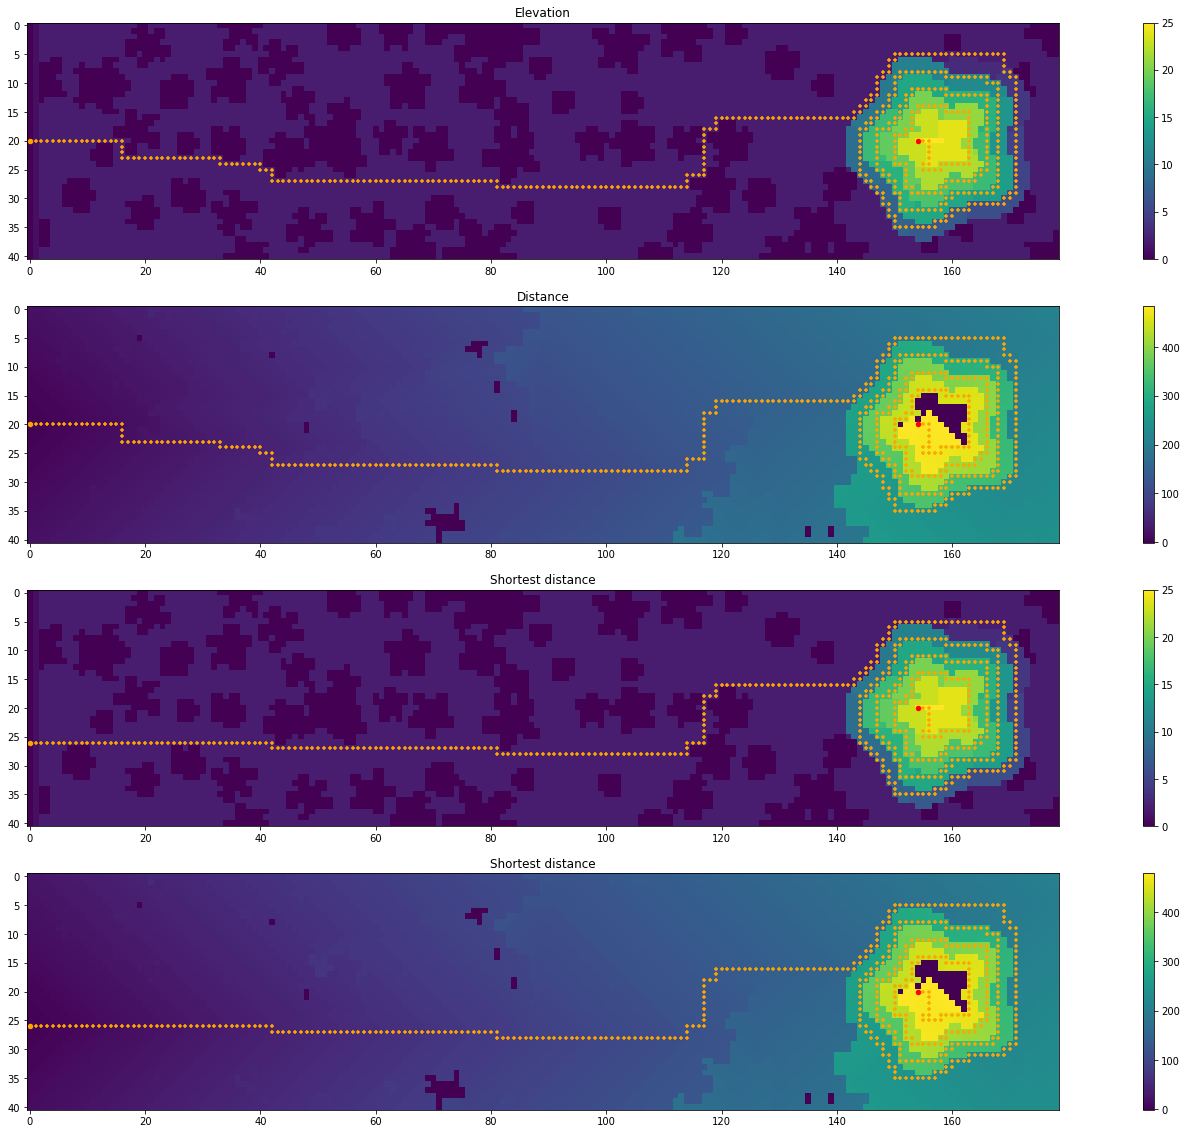

In [29]:
#@title Représentation de l'élévation'
import numpy as np
import matplotlib.pyplot as plt

map = Map(input)
map.solve()

fig, axis =  plt.subplots(4, 1, figsize=(30, 20))

def add_path(plot, map):
  path = map.path()
  for x, y in path:
    plot.scatter(x, y, s=20, c='orange', marker='+')    
  plot.scatter(map.start[0], map.start[1], s=20, c='orange', marker='o')
  plot.scatter(map.end[0], map.end[1], s=20, c='red', marker='o')


linear = axis[0].imshow(map.elevation.transpose())
add_path(axis[0], map)
axis[0].set_title("Elevation")
fig.colorbar(linear, ax=axis[0])

map.visited[map.visited == sys.maxsize] = -1
log = axis[1].imshow(map.visited.transpose())
add_path(axis[1], map)
axis[1].set_title("Distance")
fig.colorbar(log, ax=axis[1])

best_map.visited[best_map.visited == sys.maxsize] = -1
log = axis[2].imshow(best_map.elevation.transpose())
add_path(axis[2], best_map)
axis[2].set_title("Shortest distance")
fig.colorbar(log, ax=axis[2])

best_map.visited[best_map.visited == sys.maxsize] = -1
log = axis[3].imshow(best_map.visited.transpose())
add_path(axis[3], best_map)
axis[3].set_title("Shortest distance")
fig.colorbar(log, ax=axis[3])

plt.show()